In [2]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
al = pd.read_excel("D:/DataScience/Class/assignment working/Forcasting/Airlines Data.xlsx")

In [4]:
al.head(13)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [5]:
al.tail(13)

,Month,Passengers
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355


In [6]:
#checking NA values
al.isna().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
#checking Duplicates
al.duplicated

<bound method DataFrame.duplicated of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

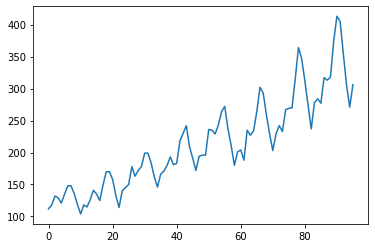

In [8]:
#plotting time series plot
al.Passengers.plot()
plt.show()

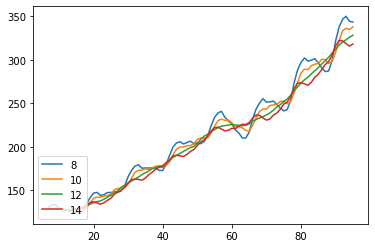

In [9]:
# Centering moving average for the time series
for i in range (8,15,2):
    al.Passengers.rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

at lag = 12 we are getting good smoothen curve

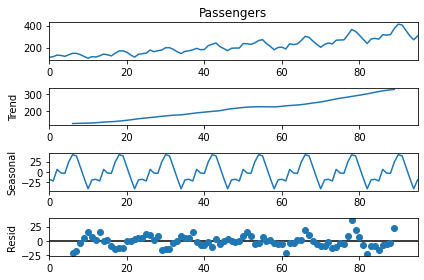

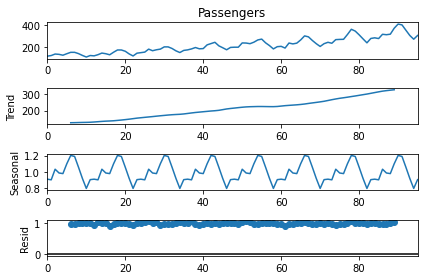

In [10]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(al.Passengers, model = "additive", period = 12)
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(al.Passengers, model = "multiplicative", period = 12)
decompose_ts_mul.plot()
plt.show()

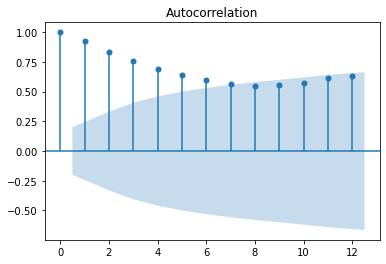

In [11]:
# ACF plot on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(al.Passengers, lags = 12)
plt.show()

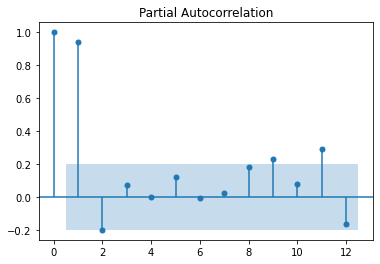

In [12]:
tsa_plots.plot_pacf(al.Passengers, lags=12)
plt.show()

In [13]:
#Splitting data into train and test

In [14]:
Train = al.head(71)
Test=al.tail(24)

In [15]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [16]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.Passengers) 

C:\Users\theas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


20.000366885320275

In [17]:
# Holt method 
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.01)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.Passengers)

10.718773009471683

In [18]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"], seasonal = "add", trend = "add", seasonal_periods = 12).fit(smoothing_level=0.01)
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.Passengers)

8.15162420154798

In [19]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit(smoothing_level=0.01)
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.Passengers) 

8.471807943001211

final model **Holts winter exponential smoothing with additive seasonality and additive trend**

In [20]:
#preparing new data to store predictions
pred = pd.read_excel("D:/DataScience/Class/assignment working/Forcasting/pred_Airlines Data.xlsx")

In [21]:
final_model = ExponentialSmoothing(al["Passengers"], seasonal = "add", trend = "add", seasonal_periods = 12).fit(smoothing_level=0.01)

In [22]:
final_pred = final_model.predict(start = pred.index[0], end = pred.index[-1])

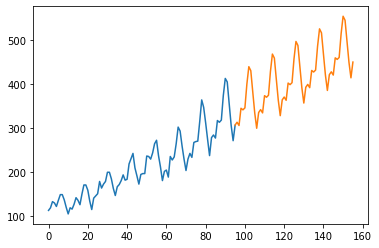

In [24]:
plt.plot(al.Passengers)
plt.plot(final_pred.iloc[95:])
plt.show()

### Predicting with Seasonal Arimax model

In [25]:
#adf test to check null hypothesis
#HO- Data is not stationary 
#HA- Data is stationary
from statsmodels.tsa.stattools import adfuller

In [26]:
test = adfuller(al.Passengers)
test

(1.3402479596467036,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [27]:
#strong evidence that data is non stationary
#ADFulller test is required for ARIMA only

### Differencing

In [28]:
#making data stationary by removing seasonality and trend

In [29]:
al["First_Difference"] = al.Passengers - al.Passengers.shift(1)

In [30]:
al["Seasonal_Difference"] = al.Passengers - al.Passengers.shift(12)

In [31]:
al.head(20)

,Month,Passengers,First_Difference,Seasonal_Difference
0,1995-01-01,112,NaN,NaN
1,1995-02-01,118,6.0,NaN
2,1995-03-01,132,14.0,NaN
3,1995-04-01,129,-3.0,NaN
4,1995-05-01,121,-8.0,NaN
5,1995-06-01,135,14.0,NaN
6,1995-07-01,148,13.0,NaN
7,1995-08-01,148,0.0,NaN
8,1995-09-01,136,-12.0,NaN
9,1995-10-01,119,-17.0,NaN


In [32]:
#again Dickey Fuller test to check data is stationary or not

In [33]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(al.Seasonal_Difference.dropna())
test

(-2.690004383862315,
 0.07578397625851786,
 1,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 531.1060746991411)

In [34]:
al["log_seasonal_diff"]=np.log(al.Seasonal_Difference)

C:\Users\theas\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
test = adfuller(al.log_seasonal_diff.dropna())
test

(-4.291584015765532,
 0.0004593575293336507,
 0,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 60.88061818964134)

we can have strong evidence against Null Hypothesis,we can reject null hypothesis, the data is stationary


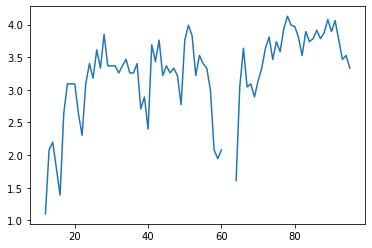

In [36]:
al.log_seasonal_diff.plot()
plt.show()

seasonality has been removed succesfully 

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict

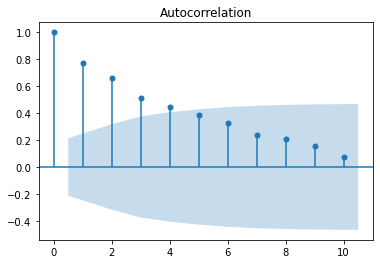

In [38]:
plot_acf(al.Seasonal_Difference.dropna(),lags=10)
plt.show()

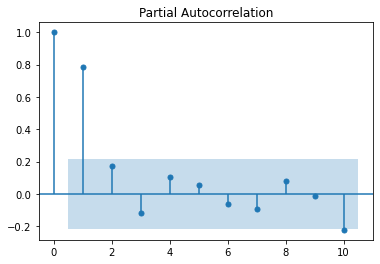

In [39]:
plot_pacf(al.Seasonal_Difference.dropna(),lags=10)
plt.show()

In [40]:
import statsmodels.api as sm

In [41]:
model = sm.tsa.statespace.SARIMAX(al["Passengers"],order=(1,1,1),seasonal_order=(1,1,1,12)) #seasonal_order=(p,d,q,m) #m=lag
results=model.fit()

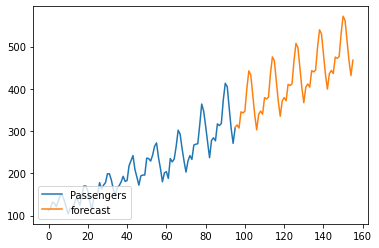

In [42]:
pred["forecast"] = results.predict(start = pred.index[0], end = pred.index[-1])
al["Passengers"].plot()
plt.legend(loc=3)
pred.forecast.iloc[95:].plot()
plt.legend(loc=3)
plt.show()